# Loading data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('temperature_dataset.csv', encoding='ISO-8859-1')
data.head(5)

ID          Site  Latitude  Longitude        Date      Time  Temp (°C)  \
0   1  Ilha Deserta   27.2706     48.331  2013/02/20  11:40:02     24.448   
1   2  Ilha Deserta   27.2706     48.331  2013/02/20  12:00:03     24.448   
2   3  Ilha Deserta   27.2706     48.331  2013/02/20  12:20:04     24.545   
3   4  Ilha Deserta   27.2706     48.331  2013/02/20  12:40:05     24.448   
4   5  Ilha Deserta   27.2706     48.331  2013/02/20  13:00:06     24.351   

   Depth  
0   12.0  
1   12.0  
2   12.0  
3   12.0  
4   12.0

# Data Preprocessing

In [2]:
# Handle missing data (if any)
data.dropna(subset=['Site','Latitude','Longitude','Date','Time','Temp (°C)','Depth'], inplace=True)
data.drop('Site', axis=1, inplace=True)
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract numerical values
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
# Convert the 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# Extract numerical values
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['Second'] = data['Time'].dt.second

# Data Visualisation

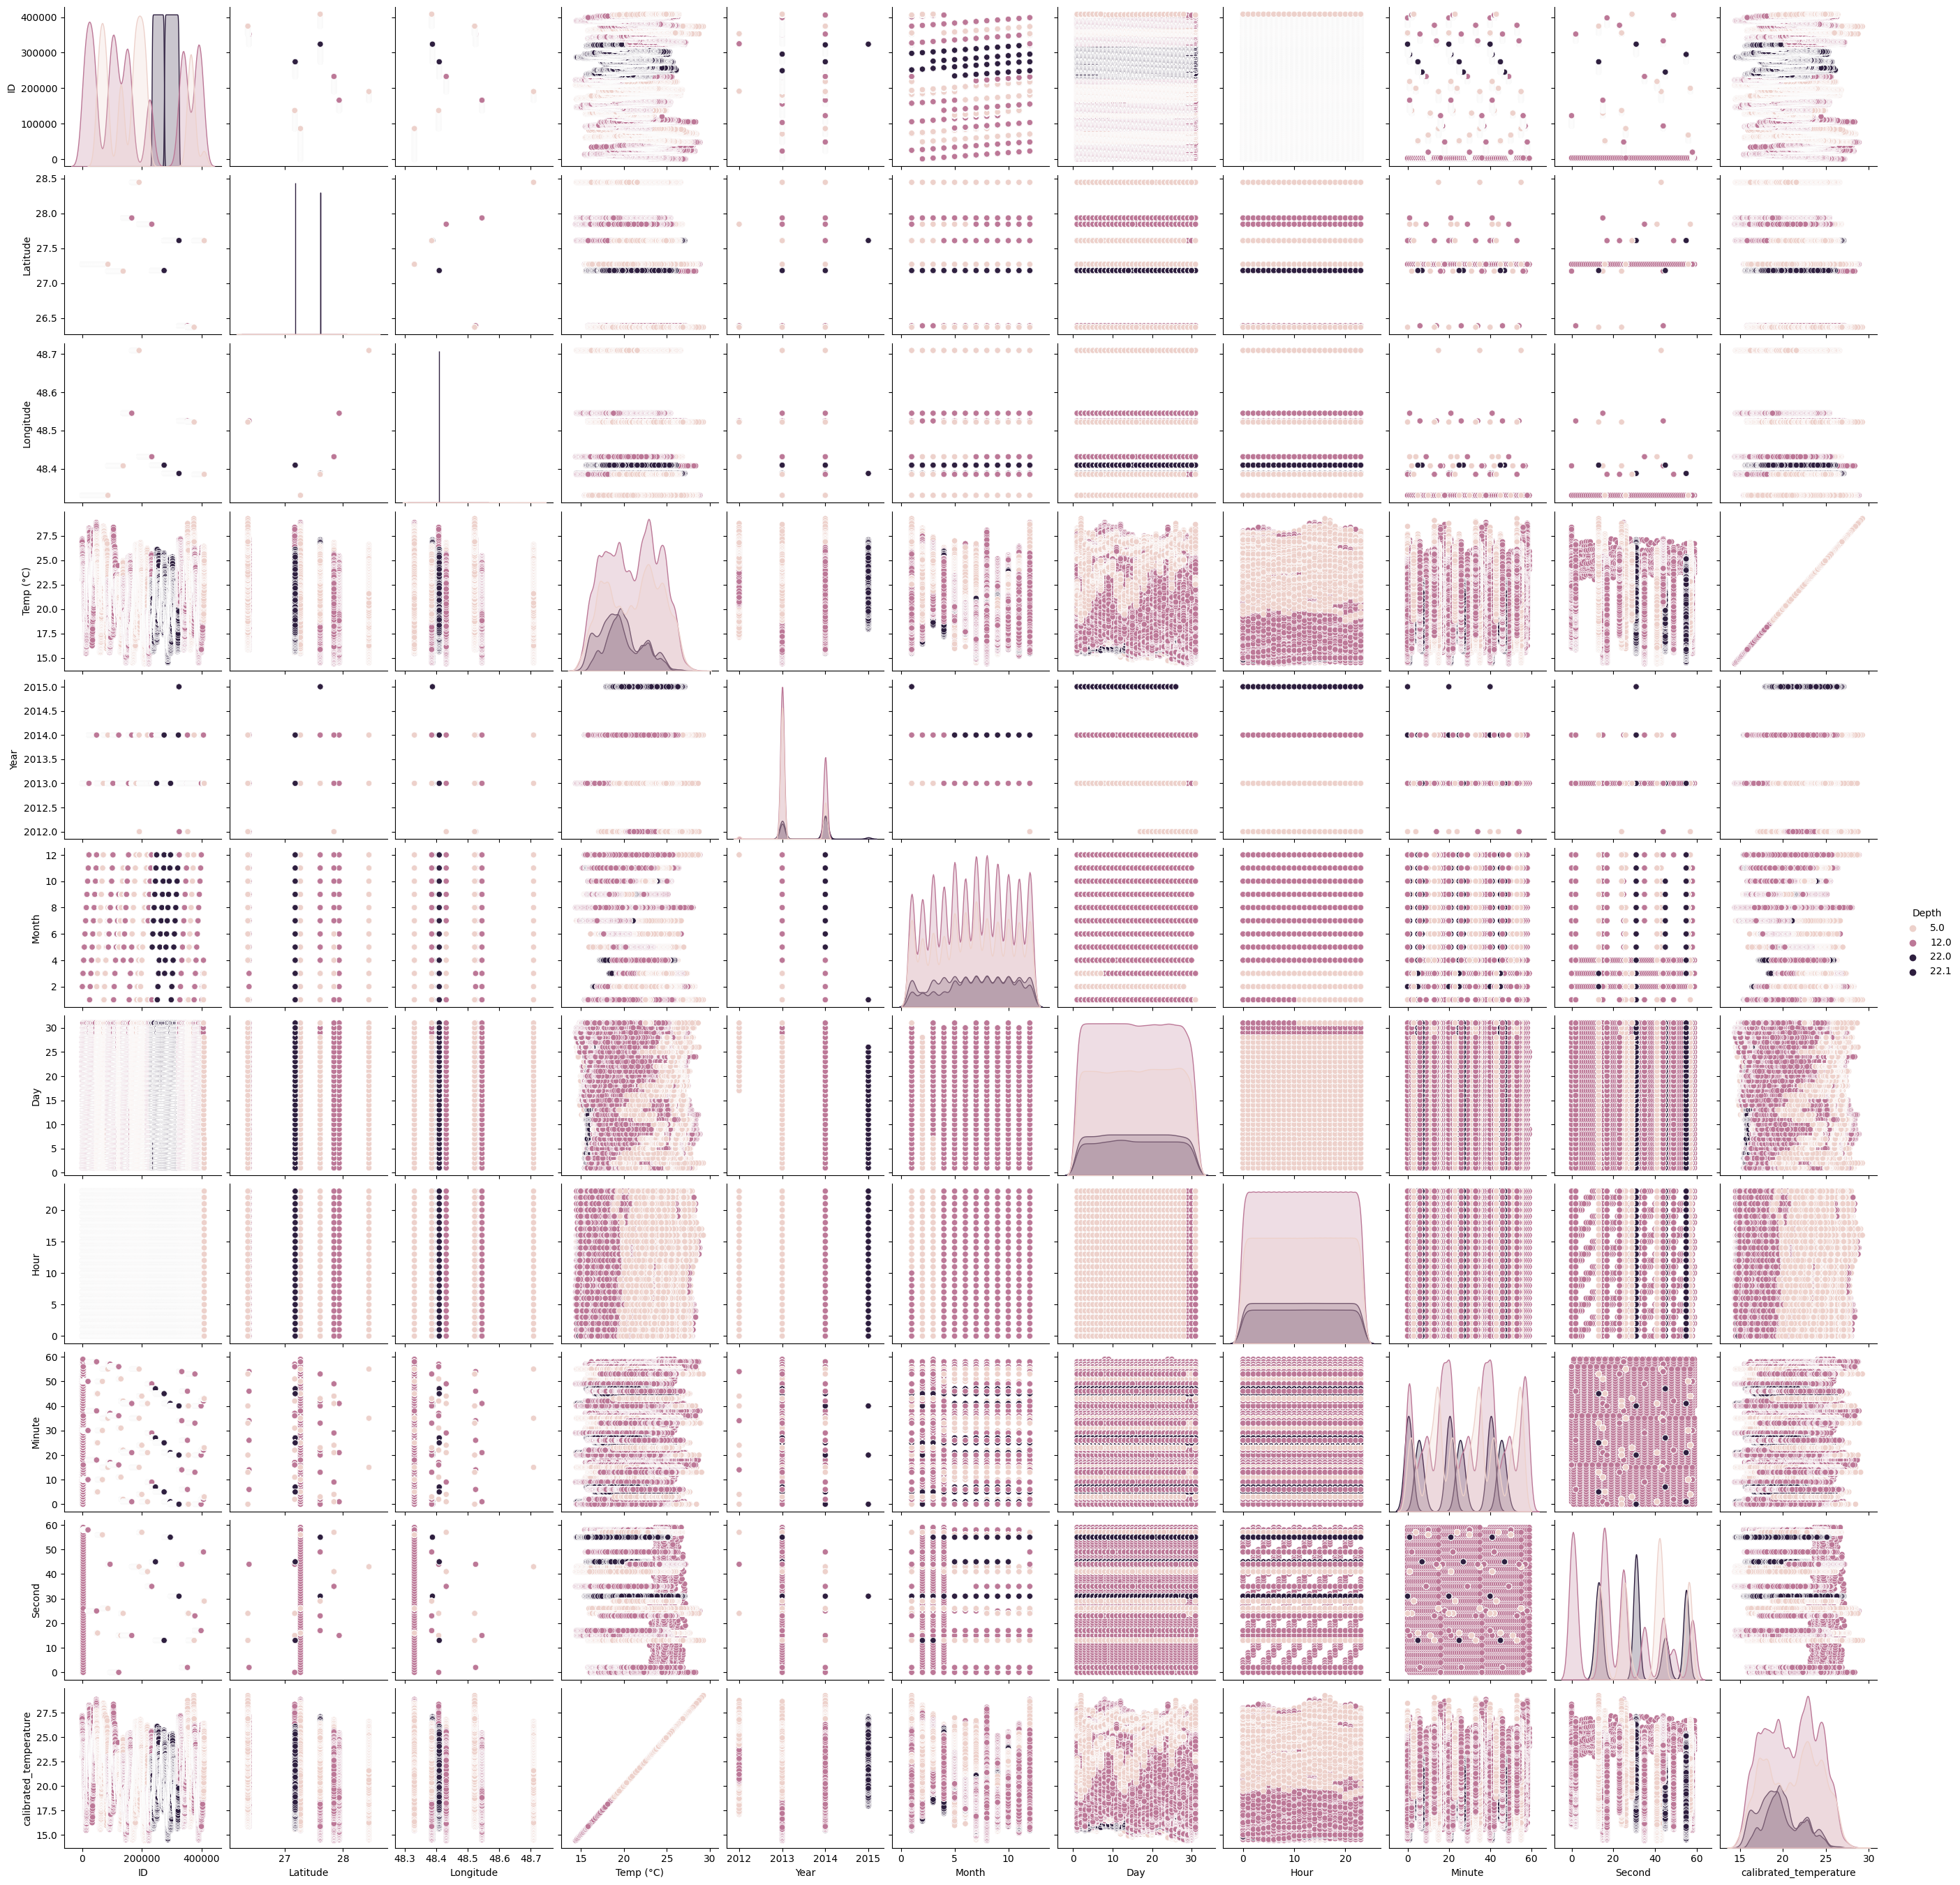

In [10]:
sns.pairplot(data, hue='Depth')
plt.show()

# Linear Calibration Function

In [6]:
# Calibration function
def linear_calibration(x, a, b):
    return a * x + b

# Modify the conditions to handle 'Depth' values in the range of 5 to 23
# Separate data into different depths
depth_5 = data[data['Depth'] == 5]
depth_10 = data[data['Depth'] == 10]

# Fit linear models for each depth if data is available
if len(depth_5) >= 2:
    params_5, covariance_5 = curve_fit(linear_calibration, depth_5['Temp (°C)'], depth_5['Temp (°C)'])

if len(depth_10) >= 2:
    params_10, covariance_10 = curve_fit(linear_calibration, depth_10['Temp (°C)'], depth_10['Temp (°C)'])

# Apply calibration to the entire dataset based on 'Depth' values
# Here, we create a dictionary to store the parameters for each 'Depth' value
calibration_params = {}
for depth_value in range(5, 24):
    depth_data = data[data['Depth'] == depth_value]
    if len(depth_data) >= 2:
        params, covariance = curve_fit(linear_calibration, depth_data['Temp (°C)'], depth_data['Temp (°C)'])
        calibration_params[depth_value] = params

# Add the 'calibrated_temperature' column using the stored parameters
data['calibrated_temperature'] = data.apply(lambda row: linear_calibration(row['Temp (°C)'], *calibration_params.get(row['Depth'], (1, 0))), axis=1)


In [7]:
data.head(5)

ID  Latitude  Longitude       Date                Time  Temp (°C)  Depth  \
0   1   27.2706     48.331 2013-02-20 1900-01-01 11:40:02     24.448   12.0   
1   2   27.2706     48.331 2013-02-20 1900-01-01 12:00:03     24.448   12.0   
2   3   27.2706     48.331 2013-02-20 1900-01-01 12:20:04     24.545   12.0   
3   4   27.2706     48.331 2013-02-20 1900-01-01 12:40:05     24.448   12.0   
4   5   27.2706     48.331 2013-02-20 1900-01-01 13:00:06     24.351   12.0   

   Year  Month  Day  Hour  Minute  Second  calibrated_temperature  
0  2013      2   20    11      40       2                  24.448  
1  2013      2   20    12       0       3                  24.448  
2  2013      2   20    12      20       4                  24.545  
3  2013      2   20    12      40       5                  24.448  
4  2013      2   20    13       0       6                  24.351

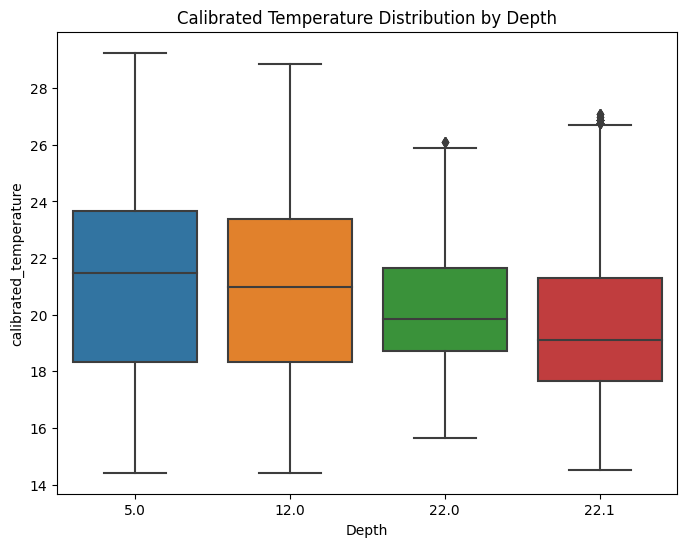

In [8]:
# Summary statistics
summary = data.groupby('Depth')['calibrated_temperature'].describe()

# Boxplot to visualize depth-wise temperature distributions
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Depth', y='calibrated_temperature')
plt.title('Calibrated Temperature Distribution by Depth')
plt.show()

# Correlation Analysis and Summary statistics

In [9]:
# Print the summary statis.tics and correlation matrix
correlation_matrix = data.corr()
print('Summary Statistics:')
print(summary)
print('\nCorrelation Matrix:')
print(correlation_matrix)

# You can add more data analysis steps as needed.

# Save the calibrated dataset to a new CSV file
data.to_csv('calibrated_temperature_data.csv', index=False)

Summary Statistics:
          count       mean       std     min     25%     50%     75%     max
Depth                                                                       
5.0    130279.0  21.148199  3.153528  14.421  18.331  21.473  23.677  29.252
12.0   187227.0  20.951971  3.031097  14.421  18.331  20.996  23.388  28.853
22.0    41438.0  20.166279  2.082355  15.664  18.711  19.853  21.664  26.097
22.1    49690.0  19.506198  2.516018  14.517  17.665  19.092  21.282  27.075

Correlation Matrix:
                              ID  Latitude  Longitude      Date      Time  \
ID                      1.000000 -0.168283   0.280193 -0.106224 -0.008470   
Latitude               -0.168283  1.000000   0.245405  0.099358 -0.003531   
Longitude               0.280193  0.245405   1.000000 -0.145487  0.000320   
Date                   -0.106224  0.099358  -0.145487  1.000000 -0.000714   
Time                   -0.008470 -0.003531   0.000320 -0.000714  1.000000   
Temp (°C)              -0.106855 -0

# Human Temperature Dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Load the "thermometry" dataset
thermometry = pd.read_csv('thermometry.csv')
thermometry.head()

body.temp gender  heart.rate
0       96.3   male          70
1       96.7   male          71
2       96.9   male          74
3       97.0   male          80
4       97.1   male          73

In [14]:
thermometry.shape

(130, 3)

In [15]:
thermometry.dtypes

body.temp     float64
gender         object
heart.rate      int64
dtype: object

In [16]:
# Data Preprocessing
# Handle missing data (if any)
thermometry.dropna(subset=['body.temp', 'gender', 'heart.rate'], inplace=True)
thermometry = pd.get_dummies(thermometry, columns=['gender'], prefix='gender', drop_first=True)

In [19]:
thermometry.head()

body.temp  heart.rate  gender_male
0       96.3          70         True
1       96.7          71         True
2       96.9          74         True
3       97.0          80         True
4       97.1          73         True

In [20]:
# Calibration function
def linear_calibration(x, a, b):
    return a * x + b

# Separate data by gender
female_data = thermometry[thermometry['gender_male'] == 0]
male_data = thermometry[thermometry['gender_male'] == 1]

print("female Data: \n",female_data)
print("male Data: \n",male_data)

female Data: 
      body.temp  heart.rate  gender_male
65        96.4          69        False
66        96.7          62        False
67        96.8          75        False
68        97.2          66        False
69        97.2          68        False
..         ...         ...          ...
125       99.3          68        False
126       99.4          77        False
127       99.9          79        False
128      100.0          78        False
129      100.8          77        False

[65 rows x 3 columns]
male Data: 
     body.temp  heart.rate  gender_male
0        96.3          70         True
1        96.7          71         True
2        96.9          74         True
3        97.0          80         True
4        97.1          73         True
..        ...         ...          ...
60       99.1          71         True
61       99.2          83         True
62       99.3          63         True
63       99.4          70         True
64       99.5          75         True



In [22]:
# Fit linear models for each gender
params_female, _ = curve_fit(linear_calibration, female_data['body.temp'], female_data['heart.rate'])
params_male, _ = curve_fit(linear_calibration, male_data['body.temp'], male_data['heart.rate'])

# Apply calibration to the entire dataset
thermometry['calibrated_heart_rate'] = np.where(thermometry['gender_male'] == 'False',
                                                linear_calibration(thermometry['body.temp'], *params_female),
                                                linear_calibration(thermometry['body.temp'], *params_male))

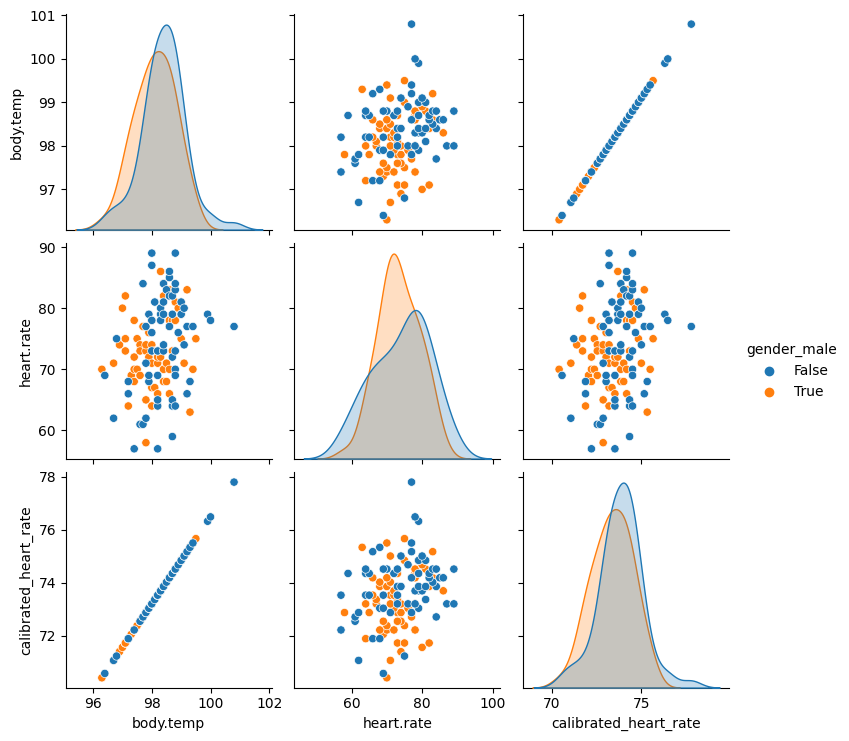

In [27]:
sns.pairplot(thermometry, hue='gender_male')
plt.show()

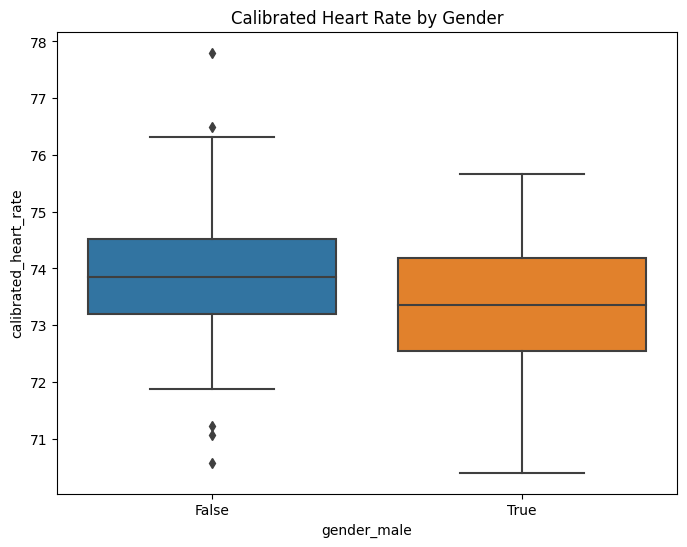

In [24]:
# Boxplot to visualize calibrated heart rate by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=thermometry, x='gender_male', y='calibrated_heart_rate')
plt.title('Calibrated Heart Rate by Gender')
plt.show()

In [25]:
# Correlation analysis if needed
correlation_matrix = thermometry.corr()
# Summary statistics
summary = thermometry.groupby('gender_male')['calibrated_heart_rate'].describe()

# Print the summary statistics and correlation matrix
print('Summary Statistics:')
print(summary)
print('\nCorrelation Matrix:')
print(correlation_matrix)

Summary Statistics:
             count       mean       std        min        25%        50%  \
gender_male                                                                
False         65.0  73.844879  1.222687  70.565943  73.197188  73.854999   
True          65.0  73.369231  1.149124  70.401490  72.539376  73.361641   

                   75%        max  
gender_male                        
False        74.512810  77.801867  
True         74.183905  75.663980  

Correlation Matrix:
                       body.temp  heart.rate  gender_male  \
body.temp               1.000000    0.253656    -0.198006   
heart.rate              0.253656    1.000000    -0.055766   
gender_male            -0.198006   -0.055766     1.000000   
calibrated_heart_rate   1.000000    0.253656    -0.198006   

                       calibrated_heart_rate  
body.temp                           1.000000  
heart.rate                          0.253656  
gender_male                        -0.198006  
calibrated_heart

In [26]:
# Save the calibrated dataset to a new CSV file
thermometry.to_csv('calibrated_thermometry_data.csv', index=False)

In [28]:
final_data = pd.read_csv('calibrated_thermometry_data.csv')
final_data.head()
print(final_data.shape)

body.temp  heart.rate  gender_male  calibrated_heart_rate
0       96.3          70         True              70.401490
1       96.7          71         True              71.059301
2       96.9          74         True              71.388207
3       97.0          80         True              71.552660
4       97.1          73         True              71.717112

In [29]:
print(final_data.shape)

(130, 4)
